## What is time series forecasting?

Time series forecasting is a statistical technique used to predict future values based on past observations. It involves analyzing patterns and trends in sequential data points over time to make predictions about future data points.

## What are the main components of a time series?
A time series typically consists of three main components:

Trend: The long-term movement or direction of the data, indicating whether it is increasing, decreasing, or remaining constant over time.  For example, increasing monthly sales of a product over several years.

Seasonality: The repetitive and predictable patterns that occur at fixed intervals within the data. For example, increased ice cream sales during the summer months.

Random or Irregular Fluctuations: The residual fluctuations that cannot be explained by the trend or seasonality.

# Use Case

ATM Cash forecasting model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# from statsmodels.tsa.arima.model import ARIMA
# from pmdarima.arima import auto_arima
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

plt.style.use('fivethirtyeight') # For plots


## 1. Load Data 

In [5]:
df = pd.read_excel("../data/RBI.xlsx")
display(df.shape)
display(df.head())
display(df.tail())

(121, 2)

,Date,CashWithdrawl
0,"June 1, 2020",4764.812000
1,"June 2, 2020",4781.974663
2,"June 3, 2020",4426.915552
3,"June 4, 2020",4424.531824
4,"June 5, 2020",4321.009311


,Date,CashWithdrawl
116,"September 25, 2020",3595.76
117,"September 26, 2020",3760.84
118,"September 27, 2020",2878.27
119,"September 28, 2020",3848.13
120,"September 29, 2020",3915.17


In [4]:
# Convert the "Date" column to a datetime object
df["Date"] = pd.to_datetime(df["Date"])

# Sort the DataFrame by date (if it's not already sorted)
df = df.sort_values("Date")

df.head()

,Date,CashWithdrawl
0,2020-06-01,4764.812000
1,2020-06-02,4781.974663
2,2020-06-03,4426.915552
3,2020-06-04,4424.531824
4,2020-06-05,4321.009311


In [5]:
# Display basic information about the DataFrame
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           121 non-null    datetime64[ns]
 1   CashWithdrawl  121 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


None

,Date,CashWithdrawl
0,2020-06-01,4764.812000
1,2020-06-02,4781.974663
2,2020-06-03,4426.915552
3,2020-06-04,4424.531824
4,2020-06-05,4321.009311


,Date,CashWithdrawl
116,2020-09-25,3595.76
117,2020-09-26,3760.84
118,2020-09-27,2878.27
119,2020-09-28,3848.13
120,2020-09-29,3915.17


In [7]:
df["CashWithdrawl"].describe().T

count     121.000000
mean     3947.881588
std       702.683669
min      1990.820000
25%      3595.760000
50%      3984.090000
75%      4476.890000
max      5165.170000
Name: CashWithdrawl, dtype: float64

In [11]:
# Find min and max dates
display(df[df["CashWithdrawl"] == df["CashWithdrawl"].min()])
display(df[df["CashWithdrawl"] == df["CashWithdrawl"].max()])

,Date,CashWithdrawl
55,"July 26, 2020",1990.82


,Date,CashWithdrawl
70,"August 10, 2020",5165.17


## plot data

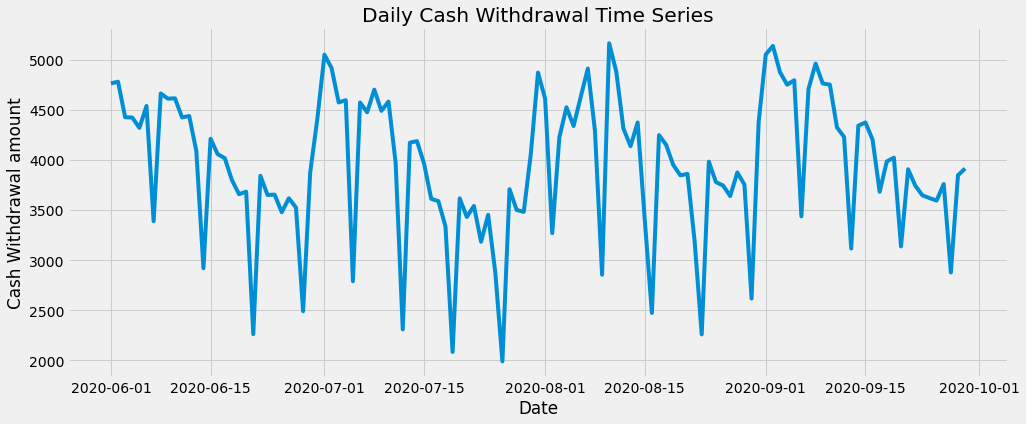

In [9]:
# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(df["Date"], df["CashWithdrawl"])
plt.xlabel("Date")
plt.ylabel("Cash Withdrawal amount")
plt.title("Daily Cash Withdrawal Time Series")
plt.grid(True)
plt.show()

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Date             0
CashWithdrawl    0
dtype: int64


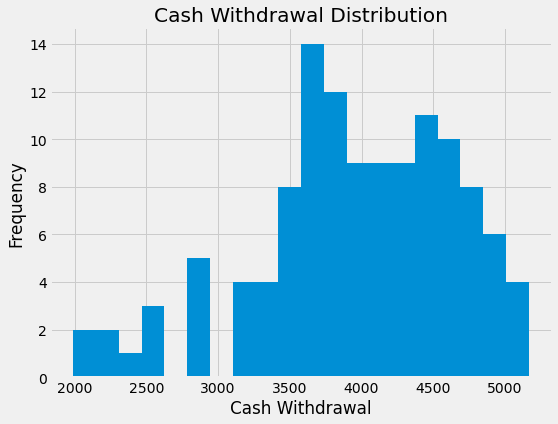

In [14]:
# Data distribution
plt.figure(figsize=(8, 6))
plt.hist(df['CashWithdrawl'], bins=20)
plt.xlabel('Cash Withdrawal')
plt.ylabel('Frequency')
plt.title('Cash Withdrawal Distribution')
plt.show()

In [10]:
df_dt_index = df.set_index('Date')
df_dt_index.head()

,CashWithdrawl
Date,
2020-06-01,4764.812000
2020-06-02,4781.974663
2020-06-03,4426.915552
2020-06-04,4424.531824
2020-06-05,4321.009311


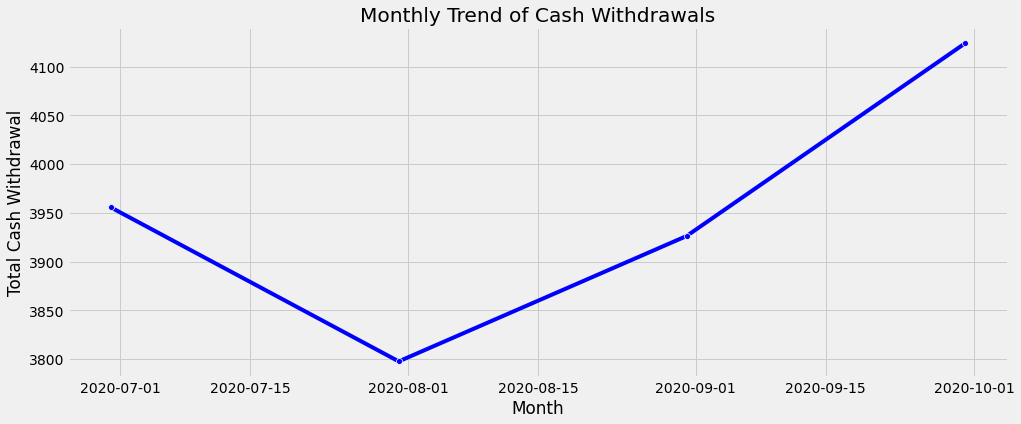

In [29]:
# Resample the data to get monthly and weekly trends
monthly_trend = df_dt_index['CashWithdrawl'].resample('M').mean()
weekly_trend = df_dt_index['CashWithdrawl'].resample('W').mean()

# df_dt_index.resample('M').mean().plot(subplots=True)

# Plotting monthly trend
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_trend, marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Total Cash Withdrawal')
plt.title('Monthly Trend of Cash Withdrawals')
plt.grid(True)
plt.show()

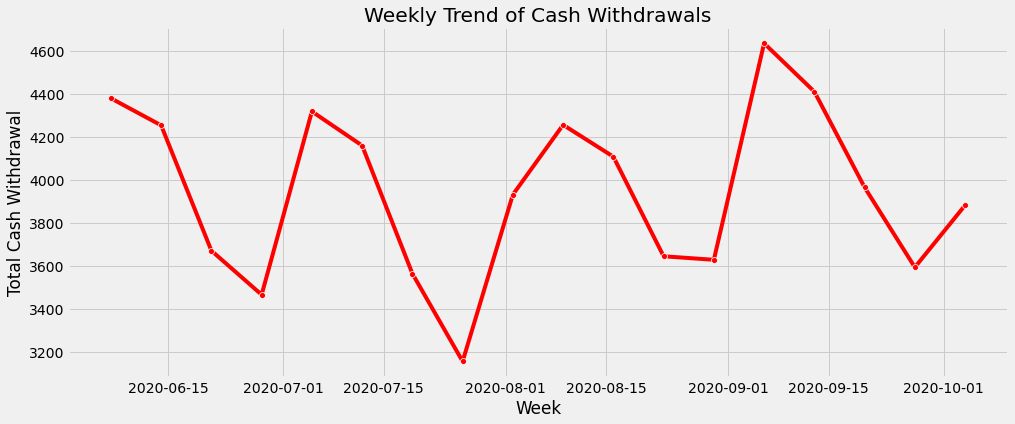

In [30]:
# Plotting weekly trend
plt.figure(figsize=(15, 6))
sns.lineplot(data=weekly_trend, marker='o', color='r')
plt.xlabel('Week')
plt.ylabel('Total Cash Withdrawal')
plt.title('Weekly Trend of Cash Withdrawals')
plt.grid(True)
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['CashWithdrawl'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -5.198570901268637
p-value: 8.851341293954322e-06
Critial Values: {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852}
Series is Stationary


In [14]:
df.head()

,Date,CashWithdrawl
0,2020-06-01,4764.812000
1,2020-06-02,4781.974663
2,2020-06-03,4426.915552
3,2020-06-04,4424.531824
4,2020-06-05,4321.009311


## if not stationary then take difference method

In [15]:
# df["CashWithdrawlDiff"] = df["CashWithdrawl"].diff().fillna(0)


## creat some time series features to see how the trends are impacted by day of week, time of year, etc.

In [31]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(df_dt_index, label='CashWithdrawl')

features_and_target = pd.concat([X, y], axis=1)

/var/folders/fv/m1mfzgfx5w33hzh9rhqn8qkm0000gn/T/ipykernel_919/3091810063.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [32]:
# See our features and target
features_and_target.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,CashWithdrawl
Date,,,,,,,,
2020-06-01,0,2,6,2020,153,1,23,4764.812000
2020-06-02,1,2,6,2020,154,2,23,4781.974663
2020-06-03,2,2,6,2020,155,3,23,4426.915552
2020-06-04,3,2,6,2020,156,4,23,4424.531824
2020-06-05,4,2,6,2020,157,5,23,4321.009311


In [36]:
features_and_target.groupby('dayofweek').agg({'CashWithdrawl': 'mean'})

,CashWithdrawl
dayofweek,
0,4236.096760
1,4250.327760
2,4209.563945
3,4093.597463
4,4164.726858
5,3923.214067
6,2722.899475


<AxesSubplot:xlabel='dayofweek'>

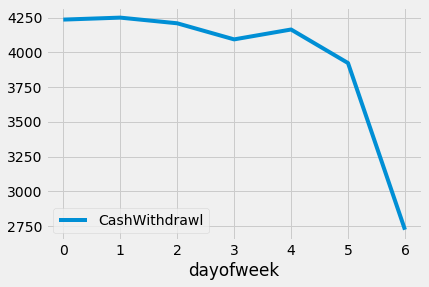

In [35]:
features_and_target.groupby('dayofweek').agg({'CashWithdrawl': 'mean'}).plot()

<AxesSubplot:xlabel='dayofmonth'>

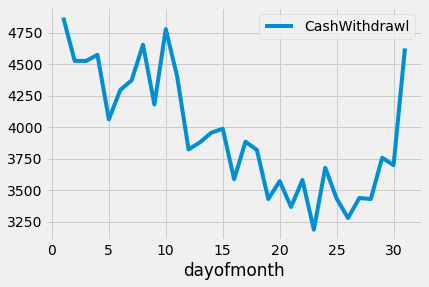

In [38]:
features_and_target.groupby('dayofmonth').agg({'CashWithdrawl': 'mean'}).plot()

## Train and Test Data

In [60]:
# Perform train-test split
train_size = int(len(df_dt_index) * 0.8)
train, test = df_dt_index[:train_size], df_dt_index[train_size:]

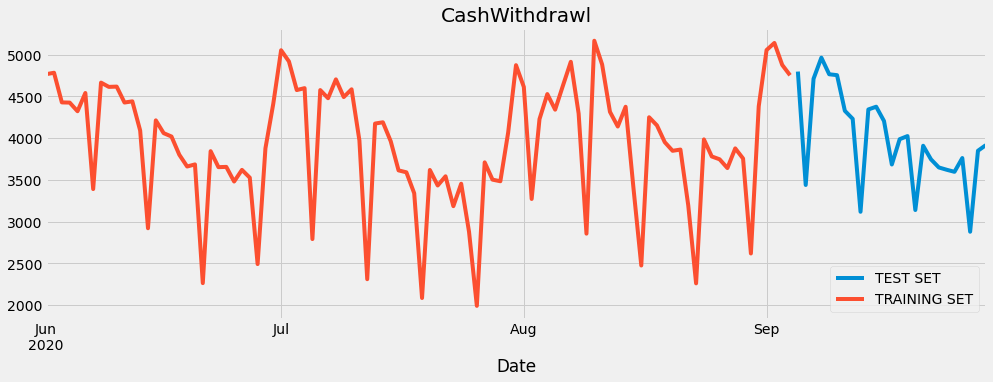

In [61]:
# Plot train and test so you can see where we have split
test.rename(columns={'CashWithdrawl': 'TEST SET'}) \
    .join(train.rename(columns={'CashWithdrawl': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='CashWithdrawl', style='-')
plt.show()

## Simple Prophet Model
Prophet model expects the dataset to be named a specific way. 

In [62]:
train.head()

,CashWithdrawl
Date,
2020-06-01,4764.812000
2020-06-02,4781.974663
2020-06-03,4426.915552
2020-06-04,4424.531824
2020-06-05,4321.009311


In [63]:
# # Format data for prophet model using ds and y
train.reset_index() \
    .rename(columns={'Date':'ds',
                     'CashWithdrawl':'y'}).head()

,ds,y
0,2020-06-01,4764.812000
1,2020-06-02,4781.974663
2,2020-06-03,4426.915552
3,2020-06-04,4424.531824
4,2020-06-05,4321.009311


In [64]:
# Initialize the Prophet model
model = Prophet()

# Add holiday effects (if applicable) - e.g., if you have holiday dates in your data
model.add_country_holidays(country_name="IN")

# Hyperparameter tuning 
model.add_seasonality(name="monthly", period=30.5, fourier_order=5)

# Fit the model to the training data
model.fit(train.reset_index()[["Date", "CashWithdrawl"]].rename(columns={"Date": "ds", "CashWithdrawl": "y"}))

/opt/anaconda3/envs/py38/lib/python3.10/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
09:53:43 - cmdstanpy - INFO - Chain [1] start processing
09:53:44 - cmdstanpy - INFO - Chain [1] done processing


/opt/anaconda3/envs/py38/lib/python3.10/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/opt/anaconda3/envs/py38/lib/python3.10/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


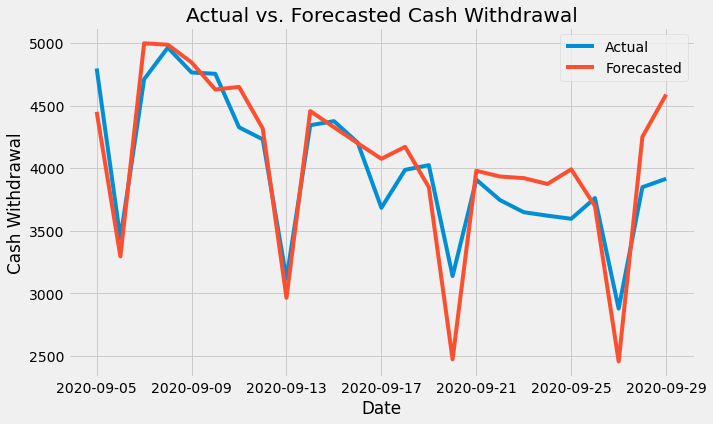

In [65]:
# Make predictions on the test data
forecast = model.predict(test.reset_index()[["Date"]].rename(columns={"Date": "ds"}))

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test.reset_index()["Date"], test.reset_index()["CashWithdrawl"], label="Actual")
plt.plot(test.reset_index()["Date"], forecast["yhat"], label="Forecasted")
plt.xlabel("Date")
plt.ylabel("Cash Withdrawal")
plt.title("Actual vs. Forecasted Cash Withdrawal")
plt.legend()
plt.grid(True)
plt.show()


In [68]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,...,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-05,4103.909960,4187.863719,4684.580144,4103.858460,4103.981812,0.0,0.0,0.0,0.0,...,355.759193,355.759193,355.759193,-9.593040,-9.593040,-9.593040,0.0,0.0,0.0,4450.076112
1,2020-09-06,4110.902690,3048.578562,3560.171187,4110.574984,4111.257048,0.0,0.0,0.0,0.0,...,485.874107,485.874107,485.874107,-1301.502080,-1301.502080,-1301.502080,0.0,0.0,0.0,3295.274717
2,2020-09-07,4117.895420,4733.204856,5236.198029,4117.098602,4118.701955,0.0,0.0,0.0,0.0,...,582.468037,582.468037,582.468037,296.684337,296.684337,296.684337,0.0,0.0,0.0,4997.047794
3,2020-09-08,4124.888149,4725.104056,5237.630082,4123.522462,4126.214213,0.0,0.0,0.0,0.0,...,564.379563,564.379563,564.379563,296.395294,296.395294,296.395294,0.0,0.0,0.0,4985.663007
4,2020-09-09,4131.880879,4611.159787,5104.198963,4129.745214,4134.020669,0.0,0.0,0.0,0.0,...,447.941658,447.941658,447.941658,264.427755,264.427755,264.427755,0.0,0.0,0.0,4844.250291


In [69]:
# Predict on test set with model
test_fcst = model.predict(df=test.reset_index().rename(columns={'Date':'ds'}))
test_fcst.head()

/opt/anaconda3/envs/py38/lib/python3.10/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/opt/anaconda3/envs/py38/lib/python3.10/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,...,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-05,4103.909960,4208.515892,4692.495529,4103.859994,4103.994569,0.0,0.0,0.0,0.0,...,355.759193,355.759193,355.759193,-9.593040,-9.593040,-9.593040,0.0,0.0,0.0,4450.076112
1,2020-09-06,4110.902690,3051.407657,3549.964840,4110.537943,4111.304866,0.0,0.0,0.0,0.0,...,485.874107,485.874107,485.874107,-1301.502080,-1301.502080,-1301.502080,0.0,0.0,0.0,3295.274717
2,2020-09-07,4117.895420,4749.265950,5256.211694,4117.037165,4118.814994,0.0,0.0,0.0,0.0,...,582.468037,582.468037,582.468037,296.684337,296.684337,296.684337,0.0,0.0,0.0,4997.047794
3,2020-09-08,4124.888149,4744.470913,5249.058055,4123.364284,4126.457941,0.0,0.0,0.0,0.0,...,564.379563,564.379563,564.379563,296.395294,296.395294,296.395294,0.0,0.0,0.0,4985.663007
4,2020-09-09,4131.880879,4606.714129,5110.453739,4129.609916,4134.158882,0.0,0.0,0.0,0.0,...,447.941658,447.941658,447.941658,264.427755,264.427755,264.427755,0.0,0.0,0.0,4844.250291


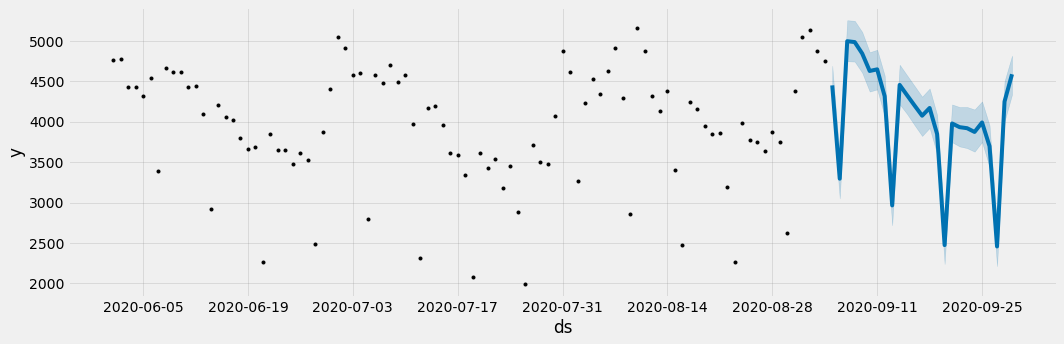

In [70]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(test_fcst,
                 ax=ax)
plt.show()

/opt/anaconda3/envs/py38/lib/python3.10/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/opt/anaconda3/envs/py38/lib/python3.10/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


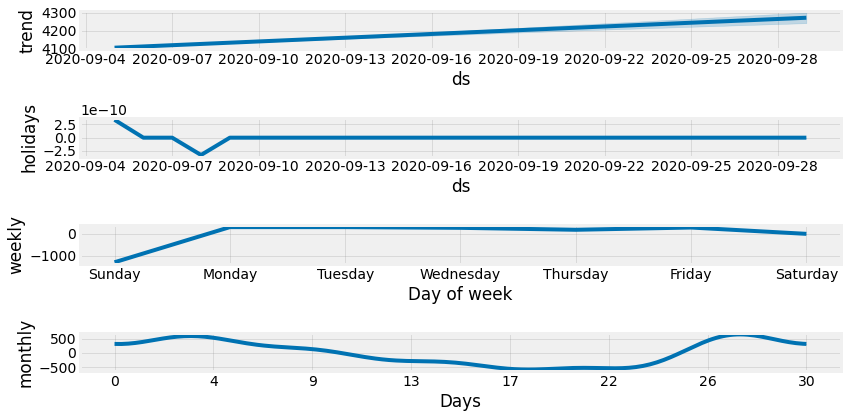

In [71]:
# Plot the components of the model
# plt.figure(figsize=(15, 6))
fig = model.plot_components(test_fcst, figsize=(12, 6))

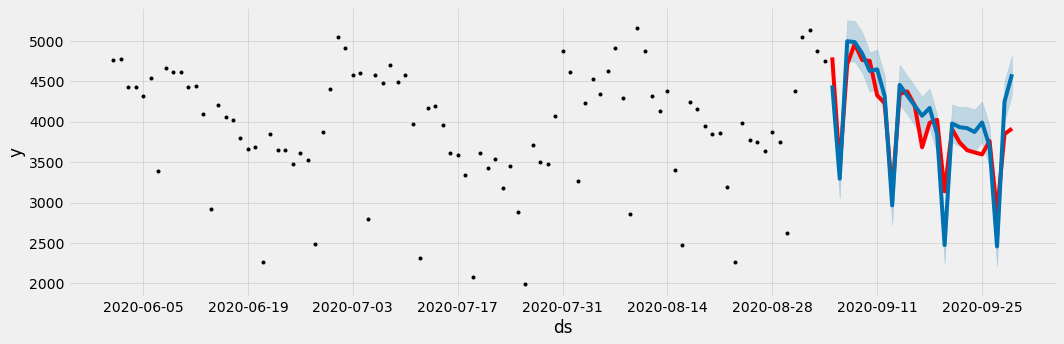

In [72]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(test.index, test['CashWithdrawl'], color='r')
fig = model.plot(test_fcst, ax=ax)

In [76]:
from datetime import datetime


## compare specific time range

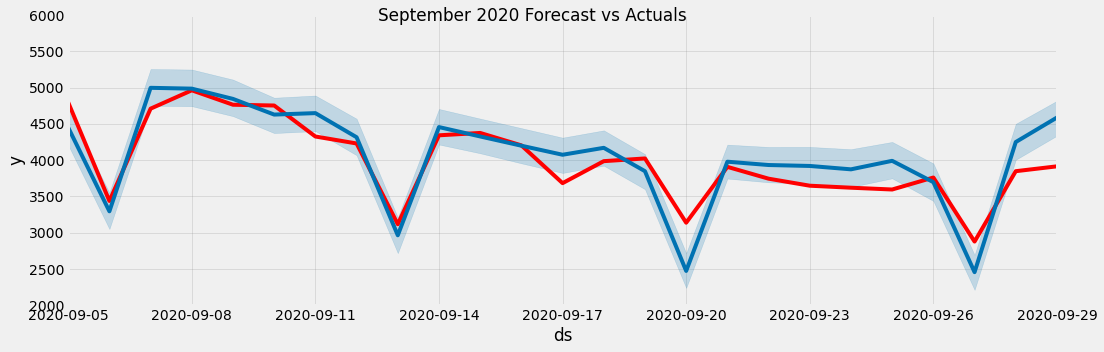

In [77]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(test.index, test['CashWithdrawl'], color='r')
fig = model.plot(test_fcst, ax=ax)
ax.set_xbound(lower=datetime.strptime('2020-09-05','%Y-%m-%d'), upper=datetime.strptime('2020-09-29','%Y-%m-%d'))
ax.set_ylim(2000, 6000)
plot = plt.suptitle('September 2020 Forecast vs Actuals')

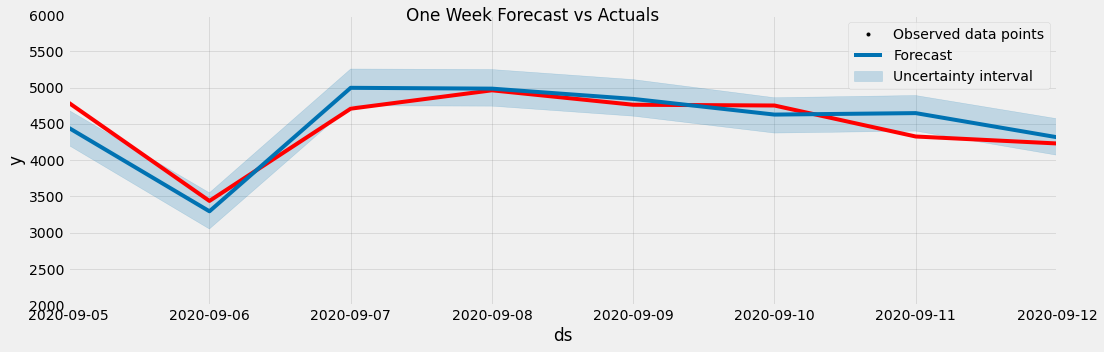

In [78]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(test.index, test['CashWithdrawl'], color='r')
fig = model.plot(test_fcst, ax=ax, include_legend=True)
ax.set_xbound(lower=datetime.strptime('2020-09-05','%Y-%m-%d'), upper=datetime.strptime('2020-09-12','%Y-%m-%d'))
ax.set_ylim(2000, 6000)
plot = plt.suptitle('One Week Forecast vs Actuals')

In [79]:
mean_squared_error(y_true=test['CashWithdrawl'],
                   y_pred=test_fcst['yhat'])

87400.71025282412

In [80]:
mean_absolute_error(y_true=test['CashWithdrawl'],
                   y_pred=test_fcst['yhat'])

235.47217064569432

## Use below two for evaluation

In [81]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=test['CashWithdrawl'],
                   y_pred=test_fcst['yhat'])

6.299289506400957

In [84]:
# Calculate R-squared score
r2 = r2_score(test["CashWithdrawl"], forecast["yhat"])

print("R-squared Score:", r2)

R-squared Score: 0.7071670289542918


## The R-squared score helps assess how well the predictions made by the model match the actual values. Here's how to interpret the R2 score:

R2 Score = 0: The model does not explain any variance in the target variable. It is as good as predicting the mean value of the target for all samples. This indicates that the model is not useful for making predictions.

R2 Score close to 1: The model explains a high proportion of the variance in the target variable. It indicates that the predictions are closely aligned with the actual values, and the model performs well.

R2 Score > 1: This is unlikely and could be a sign of an error in the calculations.

R2 Score < 0: This can happen if the model's predictions are worse than just predicting the mean value of the target. It suggests that the model performs poorly and may have a negative effect on predictions.

In [88]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, MO
import pandas as pd

class MumbaiCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year', month=1, day=1),
        Holiday('Vasant Panchami', month=1, day=29),
        Holiday('Republic Day', month=1, day=26),
        Holiday('Maha Shivratri', month=2, day=21),
        Holiday('Holi', month=3, day=10),
        Holiday('Gudi Padwa', month=3, day=25),
        Holiday('Mahavir Jayanti', month=4, day=6),
        Holiday('Good Friday', month=4, day=10),
        Holiday('Ambedkar Jayanti', month=4, day=14),
        Holiday('Maharashtra Day', month=5, day=1),
        Holiday('Eid al-Fitr', month=5, day=25, observance=nearest_workday),
        Holiday('Bakri Eid', month=7, day=31, observance=nearest_workday),
        Holiday('Independence Day', month=8, day=15),
        Holiday('Ganesh Chaturthi', month=8, day=22),
        Holiday('Muharram', month=8, day=30, observance=nearest_workday),
        Holiday('Mahatma Gandhi Jayanti', month=10, day=2),
        Holiday('Dussehra', month=10, day=25),
        Holiday('Diwali', month=11, day=14),
        Holiday('Christmas Day', month=12, day=25)
    ]

mumbai_cal = MumbaiCalendar()

# create a date range for the year 2020
r = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')

# create a series for the year 2020 indicating whether each day is a holiday or not
mumbai_holidays = pd.Series([1 if d in mumbai_cal.holidays() else 0 for d in r], index=r)

# print the holidays for the year 2020
print(mumbai_holidays[mumbai_holidays==1])



2020-01-01    1
2020-01-26    1
2020-01-29    1
2020-02-21    1
2020-03-10    1
2020-03-25    1
2020-04-06    1
2020-04-10    1
2020-04-14    1
2020-05-01    1
2020-05-25    1
2020-07-31    1
2020-08-15    1
2020-08-22    1
2020-08-31    1
2020-10-02    1
2020-10-25    1
2020-11-14    1
2020-12-25    1
dtype: int64


In [89]:
mumbai_holidays = mumbai_holidays.reset_index().rename(columns={'index': 'Date', 0: 'holiday'})
mumbai_holidays

,Date,holiday
0,2020-01-01,1
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
361,2020-12-27,0
362,2020-12-28,0
363,2020-12-29,0
364,2020-12-30,0


## DIY

In [90]:
# train.reset_index()

# df_holiday = pd.merge(left=df, right=mumbai_holidays, on='Date')
# df_holiday.head()

# mumbai_holidays_df = pd.DataFrame({'Date': r, 'holiday': mumbai_holidays})
# mumbai_holidays_df.reset_index(drop=True)

# mumbai_holidays_df.rename({'Date': 'ds'}, inplace=True)

# mumbai_holidays_df['ds'] = pd.to_datetime(mumbai_holidays_df['ds'])
# mumbai_holidays_df['ds'] = pd.to_datetime(df_holiday['ds'])

# # Setup and train model with holidays
# model_with_holidays = Prophet(holidays=mumbai_holidays_df)
# model_with_holidays.fit(train.reset_index() \
#                             .rename(columns={'Date':'ds',
#                                              'CashWithdrawl':'y'}))

## Other popular Time series model

In [ ]:
# ARIMA
def fit_arima_model(train):
    model = ARIMA(train['CashWithdrawl'], order=(5, 1, 0))
    model_fit = model.fit()
    return model_fit

In [ ]:
# AUTOARIMA
def fit_auto_arima_model(train):
    model = auto_arima(train['CashWithdrawl'], seasonal=False, stepwise=True)
    return model

In [ ]:
# PROPHET
def fit_prophet_model(train):
    model = Prophet()
    model.fit(train.rename(columns={'Date': 'ds', 'CashWithdrawl': 'y'}))
    return model

In [ ]:
# LSTM
def fit_lstm_model(train):
    X_train, y_train = np.array(train.index), np.array(train['CashWithdrawl'])
    X_train = X_train.reshape((X_train.shape[0], 1))
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)
    return model

In [ ]:
# HOLT WINTER
def fit_holt_winter_model(train):
    model = ExponentialSmoothing(train['CashWithdrawl'], seasonal_periods=7, trend='add', seasonal='add')
    model_fit = model.fit()
    return model_fit

In [ ]:
# Step 6: Compare results
models = {'ARIMA': fit_arima_model(train),
          'AUTOARIMA': fit_auto_arima_model(train),
          'PROPHET': fit_prophet_model(train),
          'LSTM': fit_lstm_model(train),
          'HOLT WINTER': fit_holt_winter_model(train)}

In [ ]:
# Step 7: Forecast and plot
def forecast_and_plot(model, test):
    forecast = model.forecast(len(test))
    mse = mean_squared_error(test['CashWithdrawl'], forecast)
    print(f'Model: {type(model).__name__}, Mean Squared Error: {mse:.2f}')
    
    plt.figure(figsize=(12, 6))
    plt.plot(train['Date'], train['CashWithdrawl'], label='Training Data')
    plt.plot(test['Date'], test['CashWithdrawl'], label='Test Data')
    plt.plot(test['Date'], forecast, label='Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('Cash Withdrawal Amount')
    plt.title(f'ATM Cash Withdrawal Forecasting using {type(model).__name__}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

for model_name, model in models.items():
    forecast_and_plot(model, test)

## Model can be blended/ensembled as well

## :)